In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

# Principal stress directions in FPS

The corresponding tensile stress at this position which must be perpendicular to the crack propagation 
\begin{align}
\sigma^{fps}_3 = f_t
\end{align}

The stresses in the global co-ordinates are expressed as:
\begin{align}
\sigma_{xz} = 
\left[
\begin{array}{cc}
\sigma_{xx} & \tau_{xz} \\
\tau_{zx} & \sigma_{zz}
\end{array}
\right] =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{fps} \\
\tau^\mathrm{fps} & \sigma_{z}
\end{array}
\right]
\end{align}

In our case $\sigma_z = 0$ as the specimen is uniaxially loaded therefore, the stress will be depicted as follows:
The stresses in the global co-ordinates are expressed as:
\begin{align}
\sigma_{xz} = 
\left[
\begin{array}{cc}
\sigma_{xx} & \tau_{xz} \\
\tau_{zx} & 0
\end{array}
\right] =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{fps} \\
\tau^\mathrm{fps} & 0
\end{array}
\right]
\end{align} 
$\sigma_x, \tau_{fps}, \sigma_z$ represents the stress in x-direction, shear stress in fracture process segment and stress in vertical direction respectively.

<img src="farfieldstress.png" width="500"/>

In [3]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
tau_fps

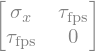

In [4]:
sigma_xz = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, 0]])
#sigma_x0 = sigma_xz.subs(sigma_z,0)
sigma_xz#, sigma_x0

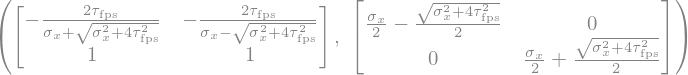

In [5]:
P_xz, D_xz = sigma_xz.diagonalize()
P_xz, D_xz

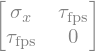

In [6]:
sp.simplify(P_xz* D_xz * P_xz**(-1))

## Representation of Far field stress in terms of Stress Intensity factors
In this implementation, the far field stress is represented in  terms of Stress Intensity factors (SIFs) where $K_I$ represents mode I and $K_{II}$ depicts mode II. This terminology of measuring stresses in SIFs for external stress acting in uniaxial direction is shown as:
\begin{gather*}
K_I = \sigma_x \sqrt{\pi a}\sin^2 \beta  \\
K_{II} = \sigma_x \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}
The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. $\beta$ represents the angle of crack orientation with respect to the vertical direction and $a$ represents the length of crack as depicted in figure. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [7]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

In [8]:
K_I = sigma_x * sp.sqrt(sp.pi * a) * s_b**2
K_II  = sigma_x * sp.sqrt(sp.pi * a) * c_b * s_b
K_I, K_II

In [9]:
K_I_ = K_I#.subs(params)
K_II_ = K_II#.subs(params)
K_I_, K_II_

## Maximum Stress Theory
This theory was given by Sih and Erdogan. It is based on the two dimensional stresses acting on the vicinity of the crack. These stresses are given in the figure below. Moreover, they are represented as:
\begin{align}
\label{eq:sigrr}
\sigma_{rr} &= \frac{1}{\sqrt{2 \pi r}}\left( K_I \left( \cos \frac{\theta}{2}\left(1 + \sin^2 \frac{\theta}{2}\right)\right) + K_{II}\left(\sin \frac{\theta}{2}\left(1 - 
3 \sin^2 \frac{\theta}{2} \right) \right) \right) + T \cos^2 \theta 
\end{align}
\begin{align}
\label{eq:sigtt}
\sigma_{\theta\theta} 
& = \frac{1}{\sqrt{2 \pi r}}\left( K_I \left( \cos^3 \frac{\theta}{2} \right) - K_{II}\left(3 \sin \frac{\theta}{2} \cos^2 \frac{\theta}{2} \right) \right) + T \sin^2 \theta
\end{align}
\begin{align}
\label{eq:sigtr}
\sigma_{r\theta} 
& = \frac{1}{\sqrt{2 \pi r}}\left( K_I \left(\sin \frac{\theta}{2} \cos^2 \frac{\theta}{2} \right) + K_{II}\left(\cos \frac{\theta}{2}\left(1 - 3 \sin^2 \frac{\theta}{2} \right) \right) \right) + T \sin \theta \cos \theta
\end{align}
For simplicity T-Stress is neglected.

In [10]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [11]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

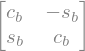

In [12]:
T_t = sp.Matrix([[c_b, -s_b],[s_b, c_b]])
T_t

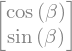

In [14]:
cs_beta_ = sp.Matrix([sp.cos(beta), sp.sin(beta)])
cs_beta_

In [16]:
Sigma_tb[0,0]

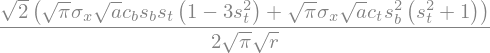

In [16]:
sigma_rr = 1/sp.sqrt(2 * sp.pi *r) * (K_I_*c_t*(1 + (s_t)**2) \
                                      + (K_II_*s_t)*(1 - 3*(s_t)**2)) #+ T*(c_t)**2
#s_rr = sigma_rr.subs(c_t, c_t_).subs(s_t, s_t_)
#s_rr
sigma_rr

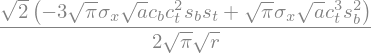

In [17]:
sigma_tt = 1/sp.sqrt(2 * sp.pi *r) * (K_I_*(c_t)**3 \
                                      - (K_II_*(3*s_t*(c_t)**2))) #+ T*s_t**2
#s_tt = sigma_tt.subs(c_t, c_t_).subs(s_t, s_t_)
#s_tt
sigma_tt

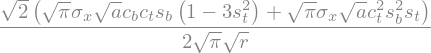

In [18]:
sigma_rt = 1/sp.sqrt(2 * sp.pi *r) * ((K_I_*(s_t*(c_t)**2)) \
                                      + ((K_II_*c_t)*(1 - 3*(s_t)**2))) #+ T*s_t*c_t
#s_rt = sigma_rt.subs(c_t, c_t_).subs(s_t, s_t_)
#s_rt
sigma_rt

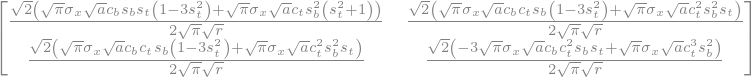

In [19]:
sigma = sp.Matrix([[sigma_rr, sigma_rt],
                     [sigma_rt, sigma_tt]])
sigma

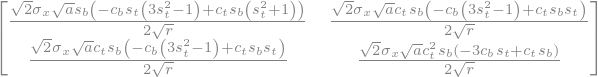

In [20]:
sigma_ = sp.simplify(sigma)
sigma_

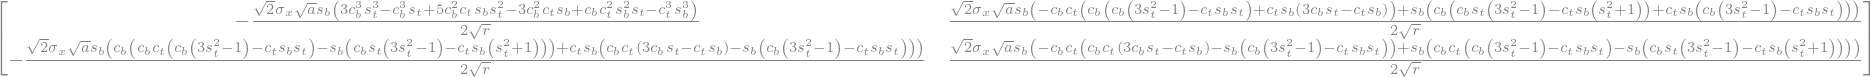

In [22]:
Sigma_tb = T_t.T * sigma_ * T_t
Sig_tb = sp.simplify(Sigma_tb)
Sig_tb

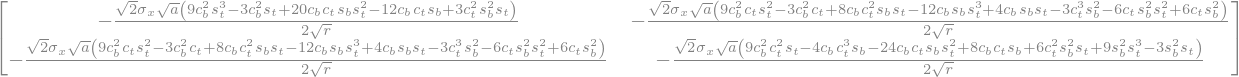

In [25]:
dsigma_d_ct = Sig_tb.diff(T_t[0,0])
dsigma_d_cs = dsigma_d_ct.diff(T_t[1,0])
dsigma_d_cs_ = sp.simplify(dsigma_d_cs)
dsigma_d_cs_

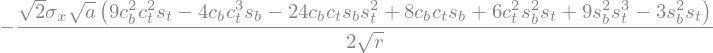

In [26]:
dsigma_d_cs_[1,1]

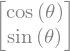

In [28]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

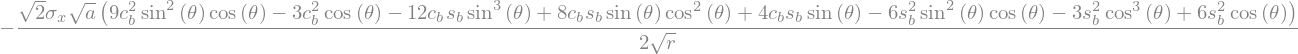

In [34]:
dsigma_d_cs_val = dsigma_d_cs_[1,0].subs(c_t, cs_theta_[0]).subs(s_t, cs_theta_[1])
dsigma_d_cs_val

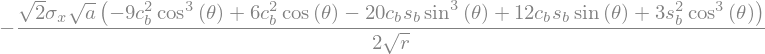

In [35]:
d = dsigma_d_cs_val.simplify()
d

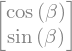

In [62]:
cs_beta_ = sp.Matrix([sp.cos(beta), sp.sin(beta)])
cs_beta_

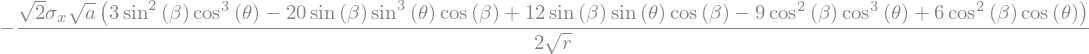

In [37]:
theta_val = d.subs(c_b, cs_beta_[0]).subs(s_b, cs_beta_[1])
theta_val

In [38]:
sp.solve(theta_val, theta)

In [92]:
get_theta = sp.lambdify((beta), theta_val, 'numpy')
get_theta

<function _lambdifygenerated(Dummy_274)>

<IPython.core.display.Javascript object>


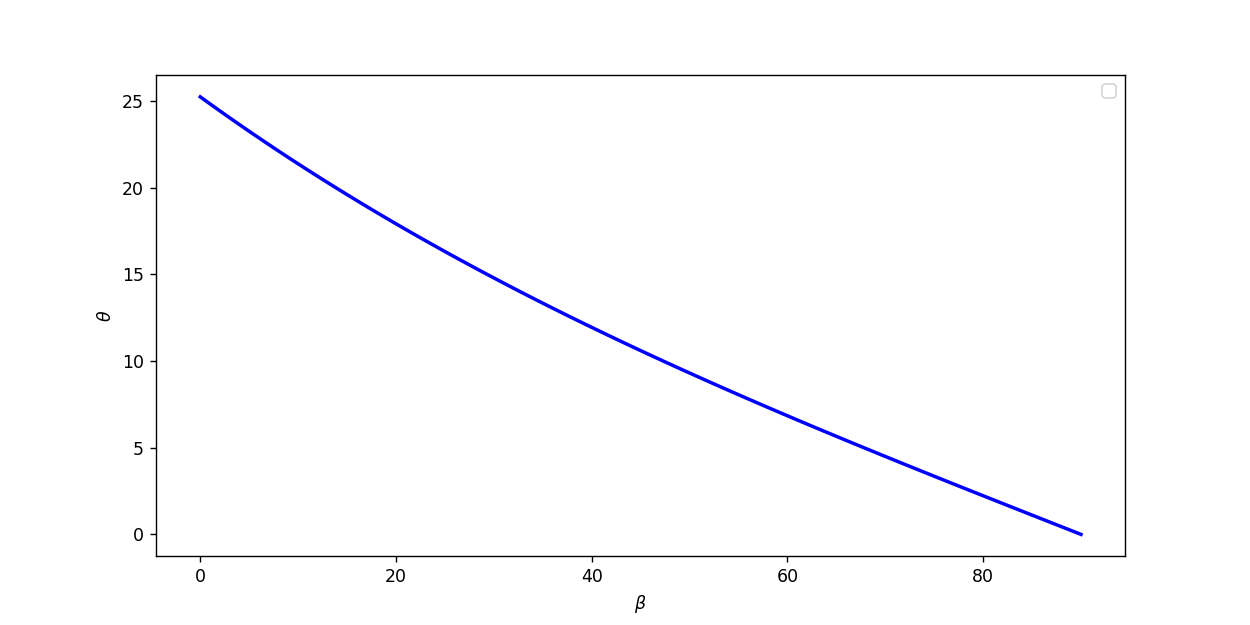

No handles with labels found to put in legend.


In [96]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
beta = np.linspace(0, 90 * np.pi/180, 100)
theta = get_theta(beta) 
ax1.plot(beta * 180/np.pi, theta * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()

In [97]:
theta * 180/np.pi

array([25.23940182, 24.86948213, 24.50348373, 24.14134565, 23.7830075 ,
       23.42840952, 23.07749255, 22.73019801, 22.38646796, 22.04624501,
       21.7094724 , 21.37609394, 21.04605402, 20.7192976 , 20.39577022,
       20.07541799, 19.75818756, 19.44402615, 19.13288152, 18.82470197,
       18.51943634, 18.21703398, 17.91744478, 17.62061914, 17.32650796,
       17.03506266, 16.74623514, 16.45997779, 16.17624349, 15.8949856 ,
       15.61615793, 15.33971479, 15.06561091, 14.7938015 , 14.5242422 ,
       14.2568891 , 13.99169872, 13.72862801, 13.46763432, 13.20867546,
       12.95170962, 12.69669539, 12.44359177, 12.19235816, 11.94295432,
       11.69534043, 11.449477  , 11.20532494, 10.96284552, 10.72200035,
       10.4827514 , 10.245061  , 10.00889179,  9.77420676,  9.54096923,
        9.30914284,  9.07869153,  8.84957957,  8.6217715 ,  8.3952322 ,
        8.16992681,  7.94582075,  7.72287973,  7.50106974,  7.28035702,
        7.06070805,  6.8420896 ,  6.62446866,  6.40781246,  6.19